In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Multivariate Linear Regression
Recall that linear regression aims to find m and b such that $\bf{y}$ ~ m$\bf{x}$ + b.  Now suppose we have more than one feature, $\bf{x}$.  That is, we have $x_1$, $x_2$, ... , $x_n$ features we wish to include in our regression.  Instead of a formula like $\bf{y}$ ~ m$\bf{x}$ + b we want a formula which looks like
$${\ }$$
$$\textbf{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$
$${\ }$$
Where $\epsilon$ is our error term as $\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$ doesn't quite equal $\bf{y}$

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
diabetes = load_diabetes()
X = diabetes['data']
Y = diabetes['target']

In [16]:
lm = LinearRegression()
lm.fit(X,Y)
m, b = lm.coef_, lm.intercept_

print('m:', m,' b:', b, '\n')

print("Mean squared error: %.2f"
      % np.mean((lm.predict(X) - Y) ** 2))
print("R2 from sklearn: %.4f"
      % r2_score(Y, lm.predict(X)))

m: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]  b: 152.133484163 

Mean squared error: 2859.69
R2 from sklearn: 0.5177


### How to find a line that represents these data?
You can draw lines which may represent the data well, but how do we find the best line?  
To determine the best fit line, think of x as as a dependent variable, y as our known output and mx + b as our predicted value of y.
It is safe to assume that the best line would minimize the distance between y and mx + b for a particular choice of m and b.
This results in an objective function (function to minimize / maximize) as:
$$\sqrt{\sum_{i=1}^n \left[y_i - (mx_i + b) \right]^2} \rightarrow min$$

### Norms
Norms or normals, also referred to as distances or metrics, are how we gauge distance with numbers.  These norms represent how long a vector is in $R^n$, or n dimensions of real numbers.  The dimensions relate to how many variables you have.

Below is the general definition for an L norm and plots of each.
$$L_p = \left(\sum_{i=1}^n x_i^p\right)^{\frac{1}{p}}$$
This leads to $L_1$, $L_2$ and $L_{\inf}$ norms as follows
$$L_1 = \sum_{i=1}^n x_i, {\ }{\ } L_2 = \sqrt{\sum_{i=1}^n x_i^2}, {\ }{\ } L_{\inf} = max\left(x_i\right)$$


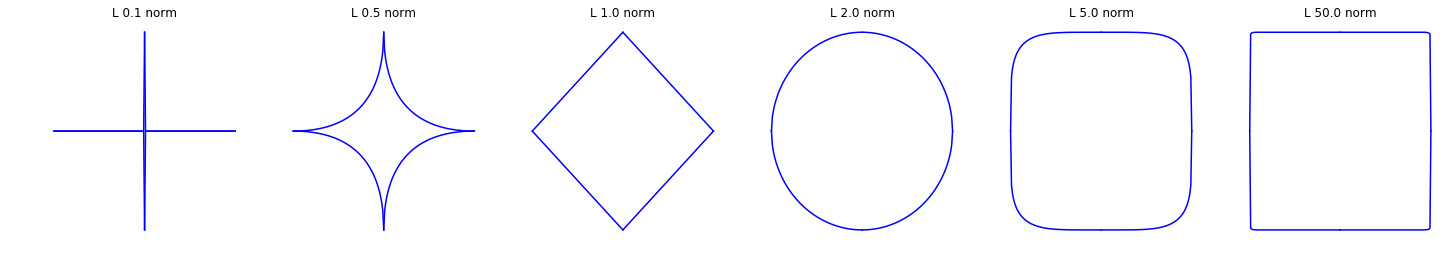

In [3]:
P = [0.1, 0.5, 1.0, 2.0, 5.0, 50.0]
x = np.linspace(0,1, 100)
fig, axes = plt.subplots(1, 6, figsize=(25,4))
for p, ax in zip(P, axes.flatten()):
    ax.plot(x, (1-x**p)**(1/p), c='blue')
    ax.plot(-x, (1-x**p)**(1/p), c='blue')
    ax.plot(x, -(1-x**p)**(1/p), c='blue')
    ax.plot(-x, -(1-x**p)**(1/p), c='blue')
    ax.axis('off')
    ax.set_title('L %.1f norm' %p)

### TO FOLLOW
* Dummy Variables
* Polynomial Fits
* Fast LR using Matrix Facorization
